In [1]:
library(ggplot2)
library(RColorBrewer)
library(cowplot)
library(gridExtra)
library(ggsci)
library(scales)
library(viridis)
library(tidyverse)

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.5     ✔ forcats 0.5.2
✔ purrr   0.3.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ dplyr::combine()    masks gridExtra::combine()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()


In [2]:
projdir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome/'

In [3]:
demux_hex = c('#FF3004', '#00A931', '#033B91', '#748705','#664110',
            '#F98502', '#48D571', '#376BBB', '#A0B341', '#6A6C62')

gex_hex = c('#FF3004', '#00A931', '#033B91', '#748705', '#664110',
            '#F98502', '#48D571', '#376BBB', '#A0B341')

atac_hex = c('#FF3004', '#00A931', '#033B91', '#748705',
            '#F98502', '#48D571', '#376BBB', '#A0B341', '#6A6C62')

In [4]:
gex_order <- c('demuxlet', 'vireo', 'souporcell', 'scsplit',  'demuxalot',
               'freemuxlet', 'vireo_nogenos', 'souporcell_nogenos', 'scsplit_nogenos')

atac_order <- c('demuxlet', 'vireo', 'souporcell', 'scsplit',
               'freemuxlet', 'vireo_nogenos', 'souporcell_nogenos', 'scsplit_nogenos', 'scavengers')

gex_geno <- c(rep('geno_based', 5), rep('geno_free', 4))
atac_geno <- c(rep('geno_based', 4), rep('geno_free', 5))

col_names <- c('method', 'geno_type')

gex_methods <- as.data.frame(gex_order)
gex_methods$geno_type <- gex_geno
colnames(gex_methods) <- col_names

atac_methods <- as.data.frame(atac_order)
atac_methods$geno_type <- atac_geno
colnames(atac_methods) <- col_names

renamed_hex <- demux_hex
tmp_order <- c('demuxlet', 'vireo', 'souporcell', 'scsplit',  'demuxalot',
               'freemuxlet', 'vireo, no genotypes', 'souporcell, no genotypes',
                  'scsplit, no genotypes', 'scavengers')
names(renamed_hex) <- tmp_order

In [5]:
doub_gex_drop <- read.table(paste0(projdir, 'csv/final_figures/figure2/doub_gex_drop_mean.csv.gz'),
                          sep='\t', header=1, row.names=1)

doub_atac_drop <- read.table(paste0(projdir, 'csv/final_figures/figure2/doub_atac_drop_mean.csv.gz'),
                          sep='\t', header=1, row.names=1)

mux_gex_drop <- read.table(paste0(projdir, 'csv/final_figures/figure2/mux_gex_drop_mean.csv.gz'),
                          sep='\t', header=1, row.names=1)

mux_atac_drop <- read.table(paste0(projdir, 'csv/final_figures/figure2/mux_atac_drop_mean.csv.gz'),
                          sep='\t', header=1, row.names=1)

In [6]:
doub_gex_donor <- read.table(paste0(projdir, 'csv/final_figures/figure2/doub_gex_donor_mean.csv.gz'),
                          sep='\t', header=1, row.names=1)

doub_atac_donor <- read.table(paste0(projdir, 'csv/final_figures/figure2/doub_atac_donor_mean.csv.gz'),
                          sep='\t', header=1, row.names=1)

mux_gex_donor <- read.table(paste0(projdir, 'csv/final_figures/figure2/mux_gex_donor_mean.csv.gz'),
                          sep='\t', header=1, row.names=1)

mux_atac_donor <- read.table(paste0(projdir, 'csv/final_figures/figure2/mux_atac_donor_mean.csv.gz'),
                          sep='\t', header=1, row.names=1)

In [7]:
doub_gex_drop$method <- factor(doub_gex_drop$method, levels = gex_order)
doub_atac_drop$method <- factor(doub_atac_drop$method, levels = atac_order)
mux_gex_drop$method <- factor(mux_gex_drop$method, levels = gex_order)
mux_atac_drop$method <- factor(mux_atac_drop$method, levels = atac_order)

In [8]:
doub_gex_donor$method <- factor(doub_gex_donor$method, levels = gex_order)
doub_atac_donor$method <- factor(doub_atac_donor$method, levels = atac_order)
mux_gex_donor$method <- factor(mux_gex_donor$method, levels = gex_order)
mux_atac_donor$method <- factor(mux_atac_donor$method, levels = atac_order)

In [9]:
gex_order <- c('demuxlet', 'vireo', 'souporcell', 'scsplit',  'demuxalot',
               'freemuxlet', 'vireo_nogenos', 'souporcell_nogenos', 'scsplit_nogenos')

atac_order <- c('demuxlet', 'vireo', 'souporcell', 'scsplit',
               'freemuxlet', 'vireo_nogenos', 'souporcell_nogenos', 'scsplit_nogenos', 'scavengers')

gex_geno <- c(rep('geno_based', 5), rep('geno_free', 4))
atac_geno <- c(rep('geno_based', 4), rep('geno_free', 5))

col_names <- c('method', 'geno_type')

gex_methods <- as.data.frame(gex_order)
gex_methods$geno_type <- gex_geno
colnames(gex_methods) <- col_names

atac_methods <- as.data.frame(atac_order)
atac_methods$geno_type <- atac_geno
colnames(atac_methods) <- col_names

In [10]:
joint_methods <- c('demuxlet', 'vireo', 'souporcell', 'scsplit',
               'freemuxlet', 'vireo_nogenos', 'souporcell_nogenos', 'scsplit_nogenos')

In [11]:
doub_gex_drop <- doub_gex_drop[doub_gex_drop$method %in% joint_methods,]
doub_atac_drop <- doub_atac_drop[doub_atac_drop$method %in% joint_methods,]
mux_gex_drop <- mux_gex_drop[mux_gex_drop$method %in% joint_methods,]
mux_atac_drop <- mux_atac_drop[mux_atac_drop$method %in% joint_methods,]

In [12]:
doub_gex_donor <- doub_gex_donor[doub_gex_donor$method %in% joint_methods,]
doub_atac_donor <- doub_atac_donor[doub_atac_donor$method %in% joint_methods,]
mux_gex_donor <- mux_gex_donor[mux_gex_donor$method %in% joint_methods,]
mux_atac_donor <- mux_atac_donor[mux_atac_donor$method %in% joint_methods,]

In [13]:
dim(doub_gex_drop)
dim(doub_atac_drop)
dim(doub_gex_donor)
dim(doub_atac_donor)

[1] 32  3

[1] 32  3

[1] 32  3

[1] 32  3

In [14]:
doub_gex_drop$mod <- 'RNA'
doub_atac_drop$mod <- 'ATAC'
doub_gex_donor$mod <- 'RNA'
doub_atac_donor$mod <- 'ATAC'

In [15]:
mux_gex_drop$mod <- 'RNA'
mux_atac_drop$mod <- 'ATAC'
mux_gex_donor$mod <- 'RNA'
mux_atac_donor$mod <- 'ATAC'

In [29]:
doub_merged_drop <- rbind(doub_gex_drop, doub_atac_drop)
doub_merged_donor <- rbind(doub_gex_donor, doub_atac_donor)
mux_merged_drop <- rbind(mux_gex_drop, mux_atac_drop)
mux_merged_donor <- rbind(mux_gex_donor, mux_atac_donor)

In [30]:
head(doub_merged_drop)

,method,amb_prop,value,mod
,<fct>,<int>,<dbl>,<chr>
0,demuxlet,0,0.9939716,RNA
1,freemuxlet,0,0.9707467,RNA
2,vireo,0,1.0000000,RNA
3,vireo_nogenos,0,0.9999722,RNA
4,souporcell,0,1.0000000,RNA
5,souporcell_nogenos,0,1.0000000,RNA


In [31]:
merged_order <- c('demuxlet', 'vireo', 'souporcell', 'scsplit',  'demuxalot',
               'freemuxlet', 'vireo_nogenos', 'souporcell_nogenos', 'scsplit_nogenos', 'scavengers')
names(demux_hex) <- merged_order
method_classes <- c(rep('Genotype-based', 5), rep('Genotype-free', 5))
class_dict <- setNames(method_classes, merged_order)
class_dict

demuxlet              vireo         souporcell            scsplit 
  "Genotype-based"   "Genotype-based"   "Genotype-based"   "Genotype-based" 
         demuxalot         freemuxlet      vireo_nogenos souporcell_nogenos 
  "Genotype-based"    "Genotype-free"    "Genotype-free"    "Genotype-free" 
   scsplit_nogenos         scavengers 
   "Genotype-free"    "Genotype-free"

In [35]:
doub_merged_drop$method_class <- class_dict[doub_merged_drop$method]
head(doub_merged_drop)

,method,amb_prop,value,mod,method_class
,<fct>,<int>,<dbl>,<chr>,<chr>
0,demuxlet,0,0.9939716,RNA,Genotype-based
1,freemuxlet,0,0.9707467,RNA,Genotype-free
2,vireo,0,1.0000000,RNA,Genotype-based
3,vireo_nogenos,0,0.9999722,RNA,Genotype-free
4,souporcell,0,1.0000000,RNA,Genotype-based
5,souporcell_nogenos,0,1.0000000,RNA,Genotype-free


In [38]:
doub_merged_drop$method_class <- class_dict[doub_merged_drop$method]
mux_merged_drop$method_class <- class_dict[mux_merged_drop$method]
doub_merged_donor$method_class <- class_dict[doub_merged_donor$method]
mux_merged_donor$method_class <- class_dict[mux_merged_donor$method]

In [40]:
head(doub_merged_drop)

,method,amb_prop,value,mod,method_class
,<fct>,<int>,<dbl>,<chr>,<chr>
0,demuxlet,0,0.9939716,RNA,Genotype-based
1,freemuxlet,0,0.9707467,RNA,Genotype-free
2,vireo,0,1.0000000,RNA,Genotype-based
3,vireo_nogenos,0,0.9999722,RNA,Genotype-free
4,souporcell,0,1.0000000,RNA,Genotype-based
5,souporcell_nogenos,0,1.0000000,RNA,Genotype-free


In [36]:
# doub_merged_drop$method_class <- class_dict[doub_merged_drop$method[match(doub_merged_drop$method, names(class_dict))]]
# mux_merged_drop$method_class <- class_dict[mux_merged_drop$method[match(mux_merged_drop$method, names(class_dict))]]
# doub_merged_donor$method_class <- class_dict[doub_merged_donor$method[match(doub_merged_donor$method, names(class_dict))]]
# mux_merged_donor$method_class <- class_dict[mux_merged_donor$method[match(mux_merged_donor$method, names(class_dict))]]

In [45]:
mean_doub_merged_drop <- doub_merged_drop %>%
  group_by(method_class, mod) %>%   # Group by amb_prop
  summarize(mean_value = mean(value, na.rm = TRUE))

mean_doub_merged_donor <- doub_merged_donor %>%
  group_by(method_class, mod) %>%   # Group by amb_prop
  summarize(mean_value = mean(value, na.rm = TRUE))

mean_mux_merged_drop <- mux_merged_drop %>%
  group_by(method_class, mod) %>%   # Group by amb_prop
  summarize(mean_value = mean(value, na.rm = TRUE))

mean_mux_merged_donor <- mux_merged_donor %>%
  group_by(method_class, mod) %>%   # Group by amb_prop
  summarize(mean_value = mean(value, na.rm = TRUE))

`summarise()` has grouped output by 'method_class'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'method_class'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'method_class'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'method_class'. You can override using the
`.groups` argument.


In [46]:
mean_doub_merged_drop

method_class,mod,mean_value
<chr>,<chr>,<dbl>
Genotype-based,ATAC,0.9475272
Genotype-based,RNA,0.9467580
Genotype-free,ATAC,0.9336732
Genotype-free,RNA,0.9361926


In [60]:
mod_order <- c('RNA', 'ATAC')

In [61]:
mean_doub_merged_drop$mod <- factor(mean_doub_merged_drop$mod, levels = mod_order)
mean_mux_merged_drop$mod <- factor(mean_mux_merged_drop$mod, levels = mod_order)
mean_doub_merged_donor$mod <- factor(mean_doub_merged_donor$mod, levels = mod_order)
mean_mux_merged_donor$mod <- factor(mean_mux_merged_donor$mod, levels = mod_order)

In [71]:
axis_size = 12
title_size = 18
ymax = 1.0
ymin = 0.5
palette = 'PuRd'

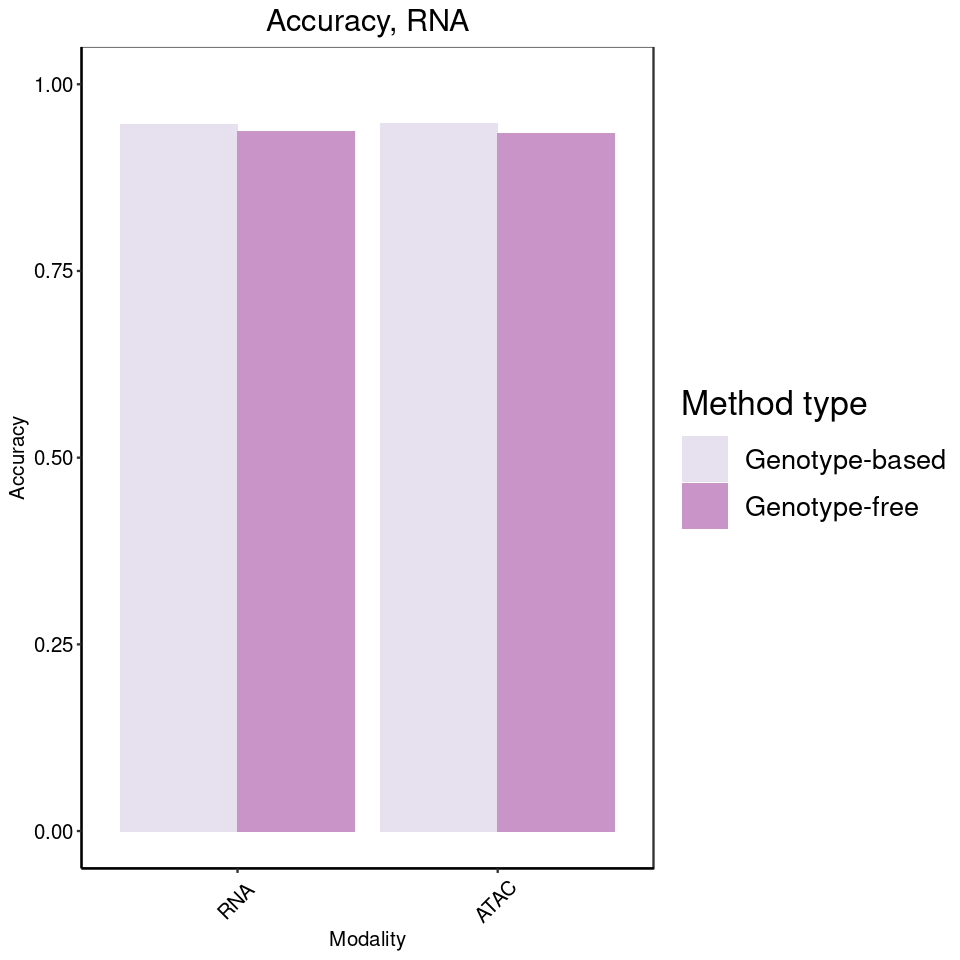

In [73]:
### for legend
options(repr.plot.width=8, repr.plot.height=8)

ggplot(mean_doub_merged_drop, aes(x = mod, y = mean_value, fill = method_class)) +
  geom_bar(stat='identity',position='dodge') + 
  labs(x = "Modality", y = "Accuracy") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, hjust=0.6, vjust=0.6, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
        axis.line = element_line(color = "black"),
         legend.key.size = unit(1, "cm"), 
     legend.title = element_text(size= 20),
         legend.text = element_text(size = 16),
         legend.position = 'right',
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_brewer(palette=palette) + 
  coord_cartesian(ylim = c(0, 1)) + 
labs(title = "Accuracy, RNA",fill='Method type') +
  guides(color = guide_legend(title = 'Modality', override.aes = list(size = 1.5)),
        shape = guide_legend(title = ''))

In [87]:
p1 <- ggplot(mean_doub_merged_drop, aes(x = mod, y = mean_value, fill = method_class)) +
  geom_bar(stat='identity',position='dodge') + 
  labs(x = "Modality", y = "Accuracy") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, hjust=0.6, vjust=0.6, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
        axis.line = element_line(color = "black"),
         legend.key.size = unit(1, "cm"), 
     legend.title = element_text(size= 20),
         legend.text = element_text(size = 16),
         legend.position = 'none',
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_brewer(palette=palette) + 
  coord_cartesian(ylim = c(0, 1)) + 
labs(title = "Droplet-type, vary doublet rate",fill='Method type')

In [94]:
p2 <- ggplot(mean_doub_merged_donor, aes(x = mod, y = mean_value, fill = method_class)) +
  geom_bar(stat='identity',position='dodge') + 
  labs(x = "Modality", y = "Accuracy") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, hjust=0.6, vjust=0.6, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
        axis.line = element_line(color = "black"),
         legend.key.size = unit(1, "cm"), 
     legend.title = element_text(size= 20),
         legend.text = element_text(size = 16),
         legend.position = 'none',
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_brewer(palette=palette) + 
  coord_cartesian(ylim = c(0, 1)) + 
labs(title = "Singleton-donor, vary doublet rate",fill='Method type')

In [95]:
p3 <- ggplot(mean_doub_merged_drop, aes(x = mod, y = mean_value, fill = method_class)) +
  geom_bar(stat='identity',position='dodge') + 
  labs(x = "Modality", y = "Accuracy") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, hjust=0.6, vjust=0.6, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
        axis.line = element_line(color = "black"),
         legend.key.size = unit(1, "cm"), 
     legend.title = element_text(size= 20),
         legend.text = element_text(size = 16),
         legend.position = 'none',
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_brewer(palette=palette) + 
  coord_cartesian(ylim = c(0, 1)) + 
labs(title = "Droplet-type, vary num muxed",fill='Method type')

In [96]:
p4 <- ggplot(mean_mux_merged_donor, aes(x = mod, y = mean_value, fill = method_class)) +
  geom_bar(stat='identity',position='dodge') + 
  labs(x = "Modality", y = "Accuracy") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, hjust=0.6, vjust=0.6, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
        axis.line = element_line(color = "black"),
         legend.key.size = unit(1, "cm"), 
     legend.title = element_text(size= 20),
         legend.text = element_text(size = 16),
         legend.position = 'none',
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_brewer(palette=palette) + 
  coord_cartesian(ylim = c(0, 1)) + 
labs(title = "Singleton-donor, vary num muxed",fill='Method type')

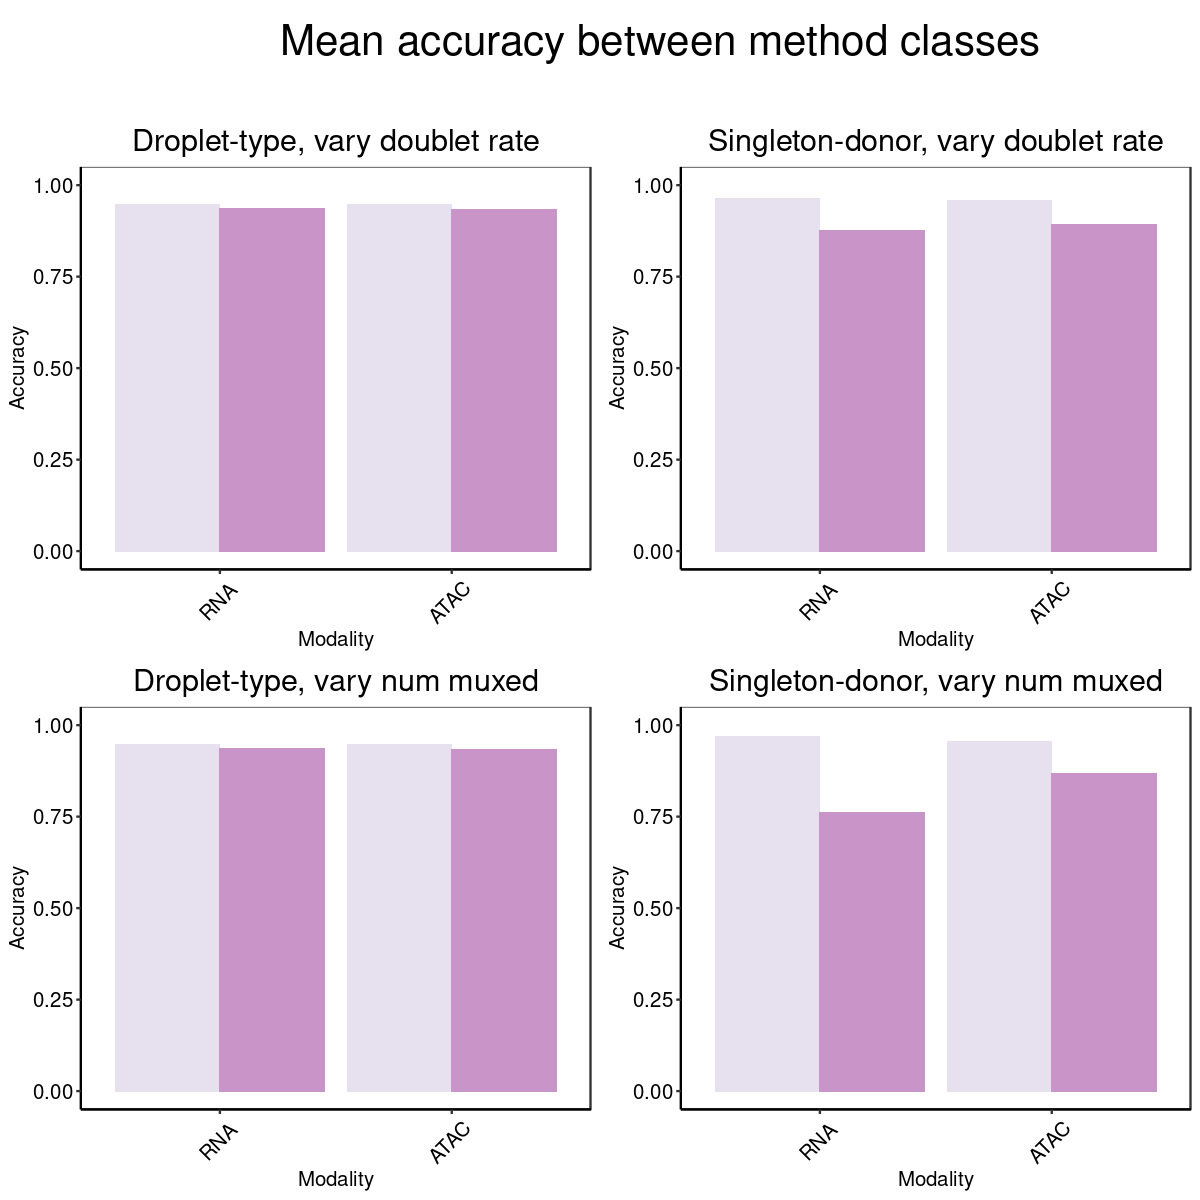

In [97]:
options(repr.plot.width=10, repr.plot.height=10)
prow <- plot_grid(p1, p2, p3, p4,
  align = 'h',
#   labels = c('A', 'B', 'C', 'D'),
    labels = c('', '', '', ''),
  nrow = 2
)
# combined_plot <- plot_grid(prow, rel_widths = c(1,1), width=400)
combined_plot <- plot_grid(prow)
final_plot <- ggdraw() +
  draw_text('Mean accuracy between method classes', x = 0.55, y = 0.98, hjust = 0.5, vjust = 1,
            size = 25, color = "black", family = "arial") +
  draw_plot(combined_plot, x = 0, y = 0, width = 1, height = 0.9)

# Show the final plot
print(final_plot)